In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set()

In [2]:
data = pd.read_csv('real_estate.csv')
data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
5,245050.280,575.19,2006,Sea view
6,265129.064,570.89,2015,Sea view
7,175716.480,620.82,2006,No sea view
8,331101.344,682.26,2018,Sea view
9,218630.608,694.52,2009,No sea view


### critical thinking

- **Process**
    - size affects prices
    - prices in rural areas may be flactuated. so sample size is critical
    
   
- **Omitted Variable Bias** : 
    - real estate prices are very complex, so reducing to 1 variable is **questionable**. 
    - any critical _categorical variable_ which effects prediction critically?
- **Critical checkpoints for the predicted function**
    - ....

In [3]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


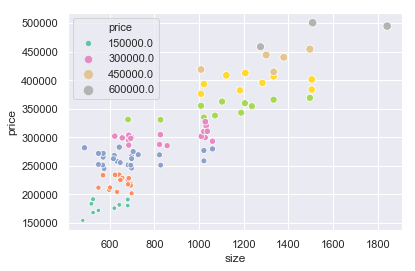

In [4]:
axS = sns.scatterplot(x='size', y='price', hue='price', size='price', palette='Set2', data=data)


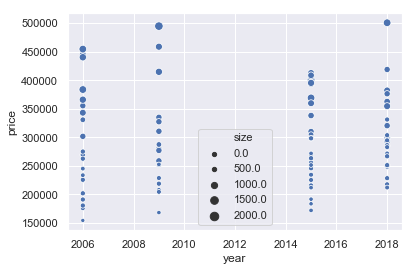

In [5]:
axY = sns.scatterplot(x='year', y='price', size='size', palette='Set2', data=data)


In [6]:
# we need OLS w/ constant **for lineer regression**
y = data['price']
x = sm.add_constant(data[['size']])

results = sm.OLS(y, x).fit()
results.summary()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           8.13e-31
Time:                        11:01:54   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## above lineer function

#### y(price) = 101190 + 223.18 * x1(size)

- const.p-value=0 < 0.05, x1(size)'s p-value=0.000 <0.05, so, it is ok for 95% Confidence Interval !

That means price and const are significantly different from zero
- r-square=74%, not bad. We may need more variables
- F-statistic's p-value is very close to zero. We may need more variables
- it seems 3 segments: small-size, medium-size, bigger-sizes. But for bigger-sizes, we have less data, which means for biggre sizes our prediction may not performed well !

## below  lineer function (w/ year variable)

- new R-squared increased. Adjusted R-squared increased
- year's p-value=0, means significant. But year's std.error increased, too!

#### y(price) =  227.7009 * x1(size) + 2916.7853 * x2(year) - 5772000


In [7]:
# we need OLS w/ constant **for lineer regression**
y = data['price']
x = sm.add_constant(data[['size', 'year']])

results = sm.OLS(y, x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           2.77e-32
Time:                        11:01:54   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

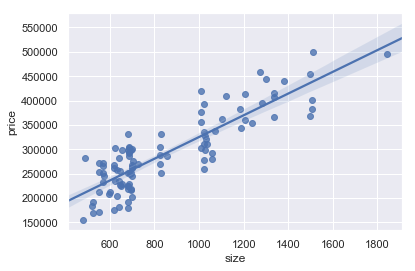

In [11]:
sns.regplot(x="size", y="price", data=data);
# sns.lmplot(x="size", y="price", col='size', data=data);
